In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
X=iris.data
Y=iris.target

In [6]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [21]:
iris_data=DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [22]:
iris_target=DataFrame(Y,columns=['Species'])

In [23]:
def flower(num):
    if num==0:
        return 'Setosa'
    elif num==1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [24]:
iris_target=iris_target['Species'].apply(flower)

In [28]:
iris=pd.concat([iris_data,iris_target],axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


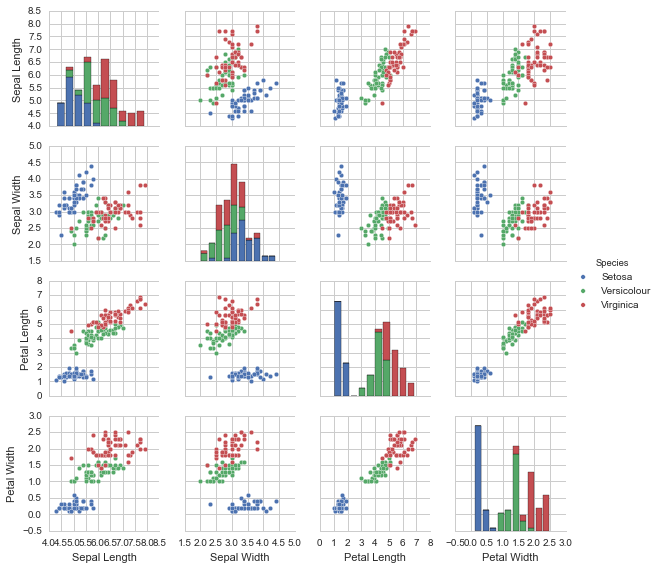

In [27]:
sns.pairplot(iris,hue='Species',size=2)

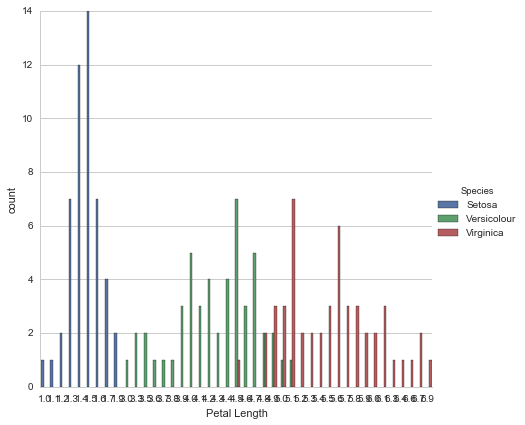

In [34]:
sns.factorplot('Petal Length',data=iris,hue='Species',kind='count',size=6)

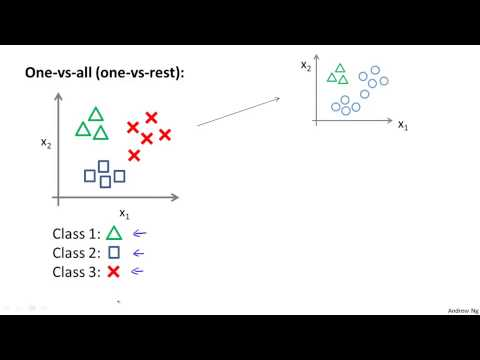

In [35]:
# Andrew Ng's visual Explanation for Multiclass Classification
from IPython.display import YouTubeVideo
YouTubeVideo("Zj403m-fjqg")

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [40]:
logreg=LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [42]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
from sklearn import metrics

In [44]:
Y_pred = logreg.predict(X_test)

In [45]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.933333333333


In [48]:
logreg.penalty

'l2'

In [49]:
#kns classification
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=6)

In [51]:
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [52]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [53]:
Y_pred=knn.predict(X_test)

In [54]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.95


In [55]:
knn = KNeighborsClassifier(n_neighbors=1)

In [56]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [57]:
Y_pred=knn.predict(X_test)

In [58]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.966666666667


In [59]:
k_range=range(1,21)
accuacy=[]

In [60]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred=knn.predict(X_test)
    
    accuacy.append(metrics.accuracy_score(Y_test, Y_pred))

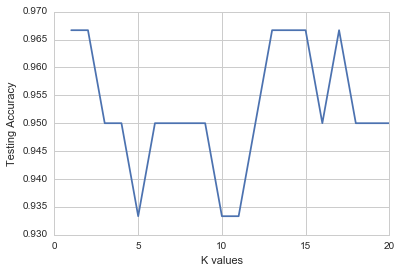

In [62]:
plt.plot(k_range, accuacy)
plt.xlabel('K values')
plt.ylabel('Testing Accuracy')

In [66]:
X?
